# LAB 4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

In [3]:
housing_data = pd.read_csv('USA_Housing.csv')
housing_data.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

In [4]:
housing_data.describe()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.000000       172.610686  1.593866e+04  
25%                        3.140000     29403.928702  9.975771e+05  
50%                        4.050000     36199.406689  1.232669e+06  
75%                        4.490000     42861.290769  1.471210e+06  
max                        6.500000     69621.713378  2.469066e+06

In [5]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


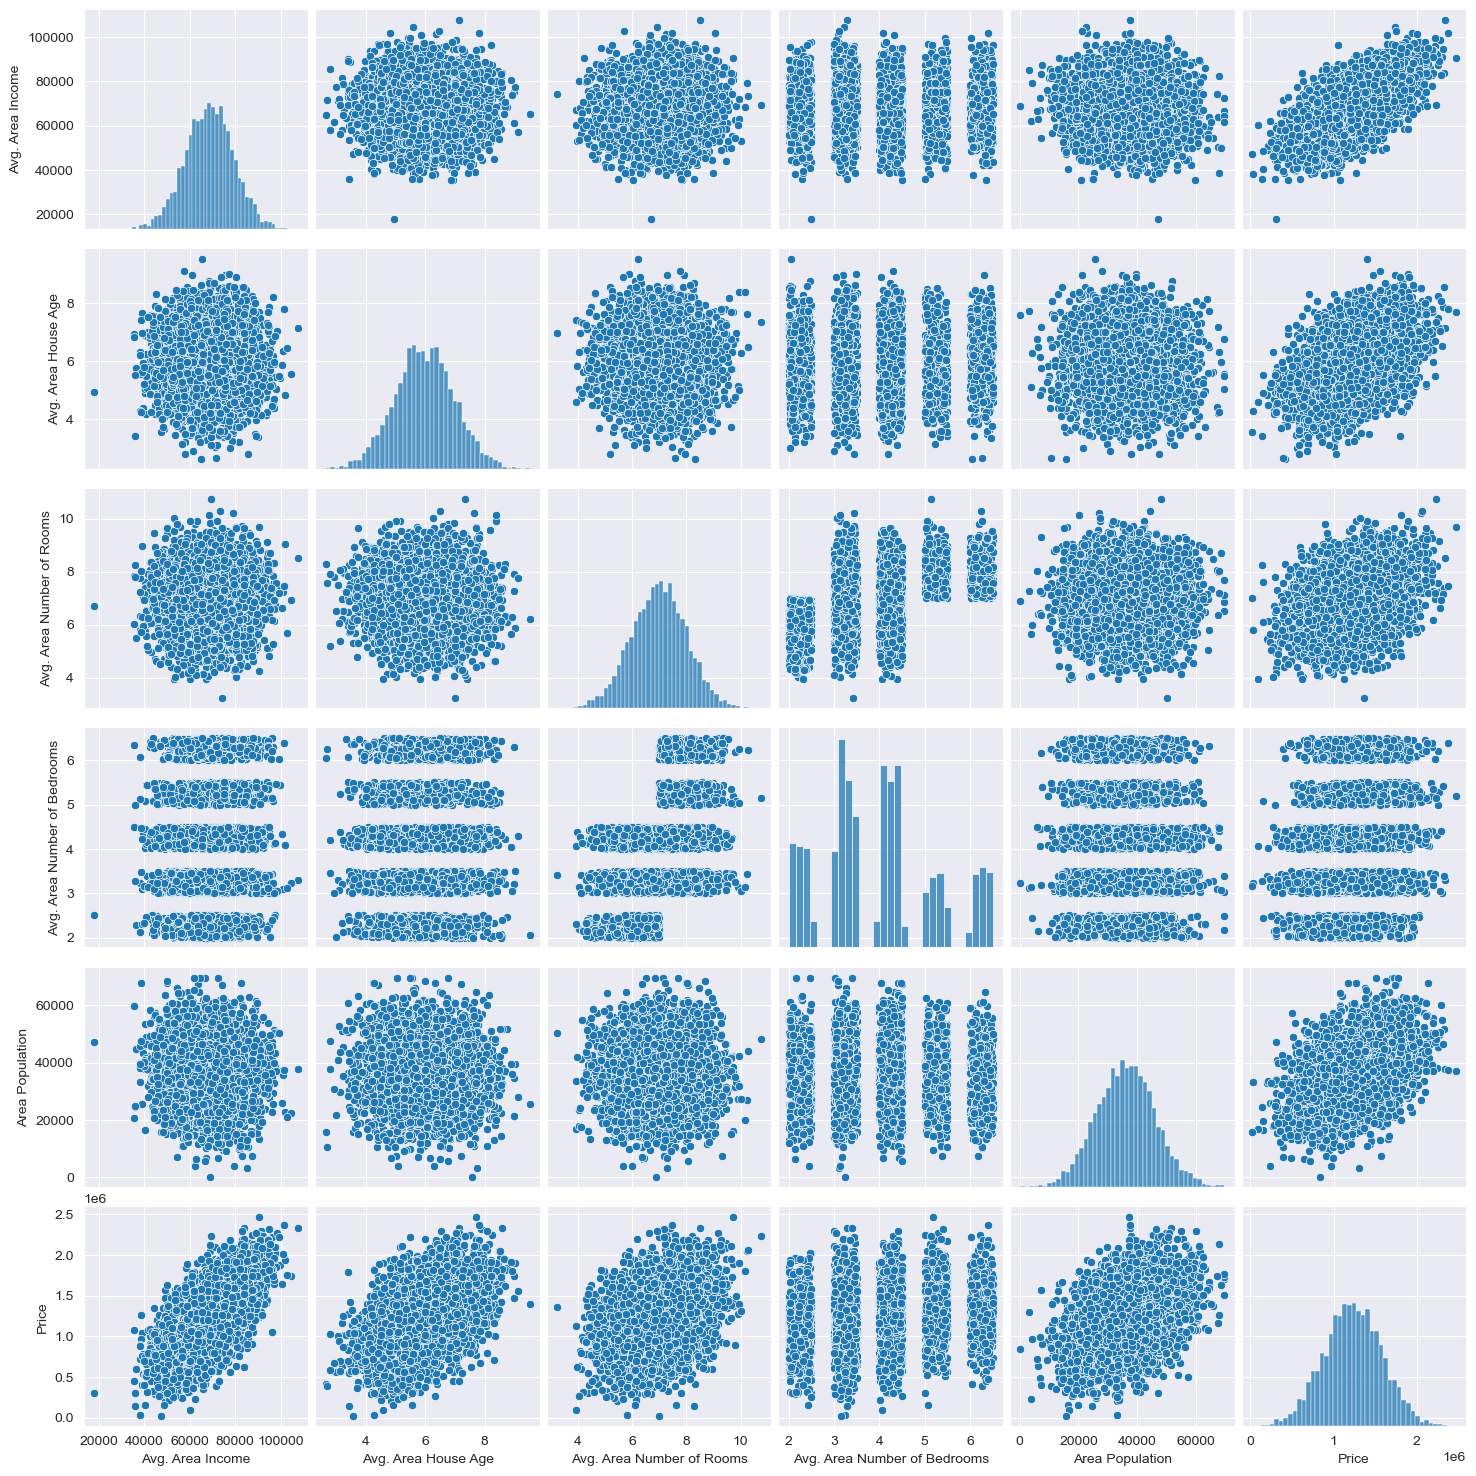

In [6]:
sns.pairplot(housing_data)
plt.show()

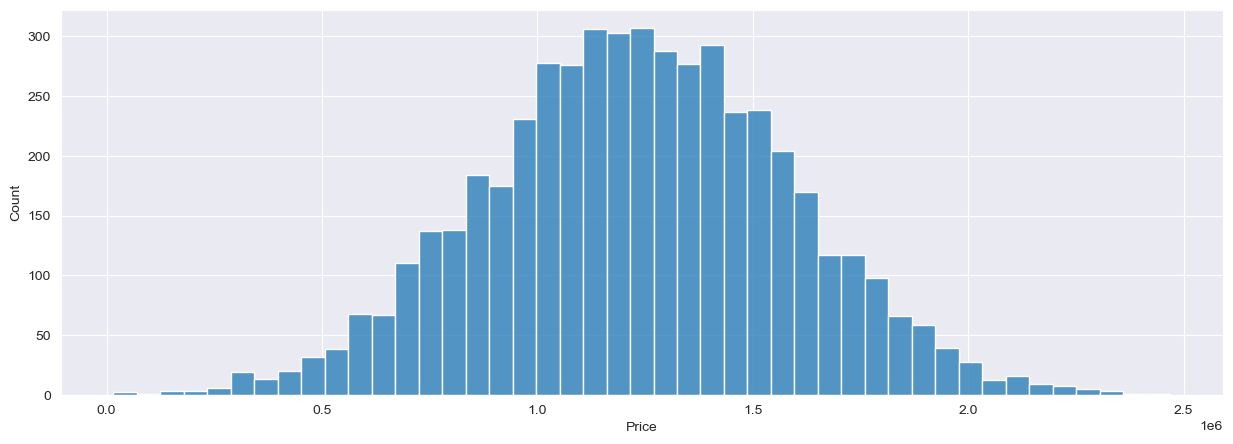

count    5.000000e+03
mean     1.232073e+06
std      3.531176e+05
min      1.593866e+04
25%      9.975771e+05
50%      1.232669e+06
75%      1.471210e+06
max      2.469066e+06
Name: Price, dtype: float64


In [7]:
sns.histplot(housing_data['Price'])
plt.show()
print(housing_data['Price'].describe())

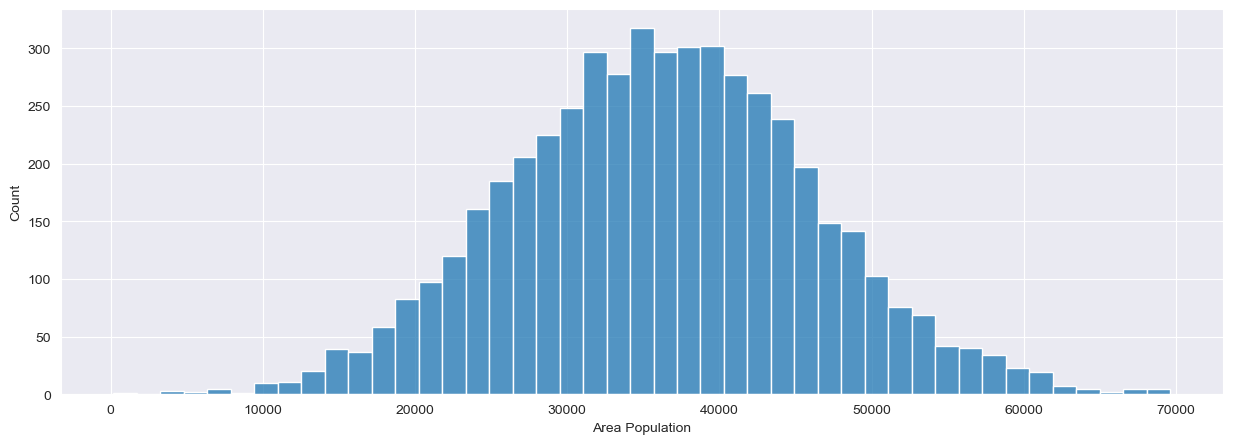

count     5000.000000
mean     36163.516039
std       9925.650114
min        172.610686
25%      29403.928702
50%      36199.406689
75%      42861.290769
max      69621.713378
Name: Area Population, dtype: float64


In [8]:
# Personal Practice 1
sns.histplot(housing_data['Area Population'])
plt.show()
print(housing_data['Area Population'].describe())

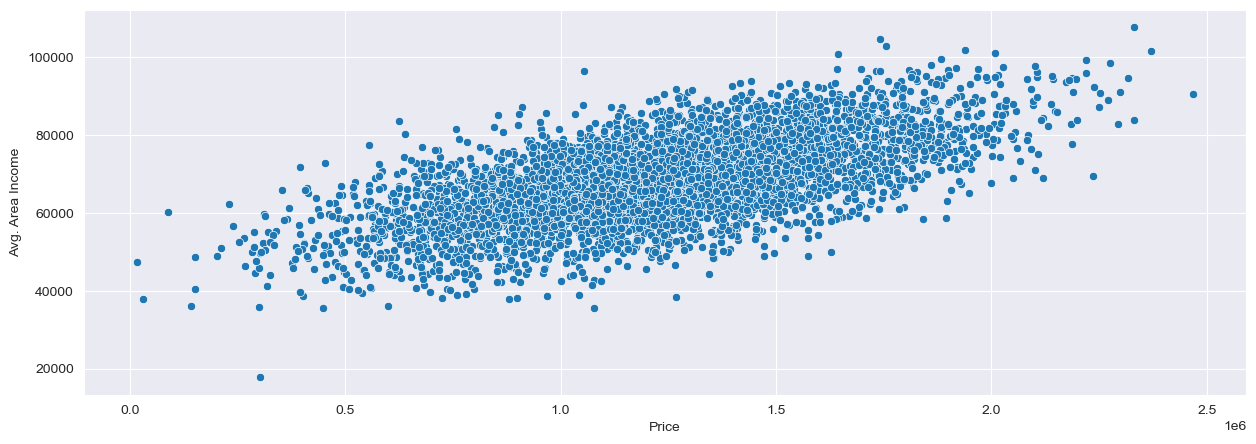

In [9]:
sns.scatterplot(x = 'Price', y = 'Avg. Area Income', data = housing_data)
plt.show()

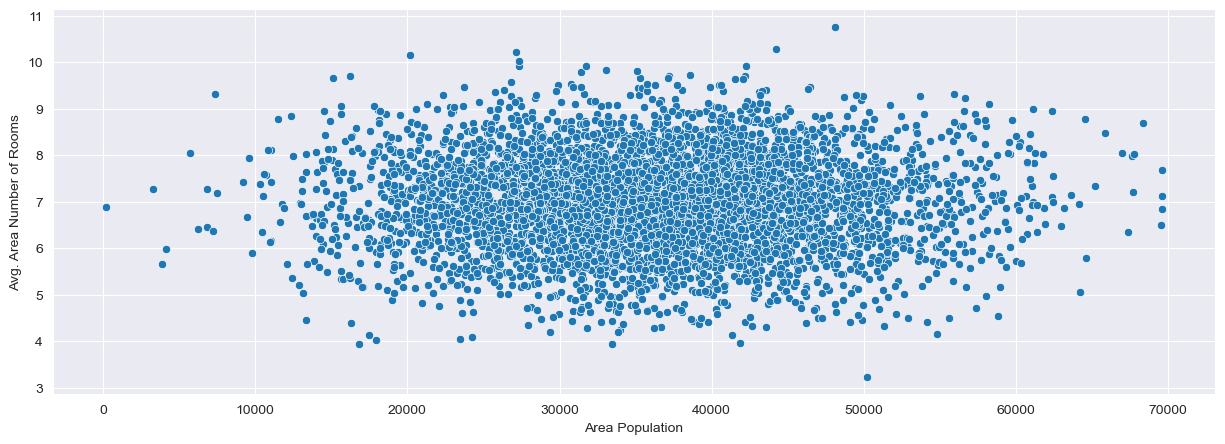

In [10]:
# Personal Practice 2
sns.scatterplot(x = 'Area Population', y = 'Avg. Area Number of Rooms', data = housing_data)
plt.show()

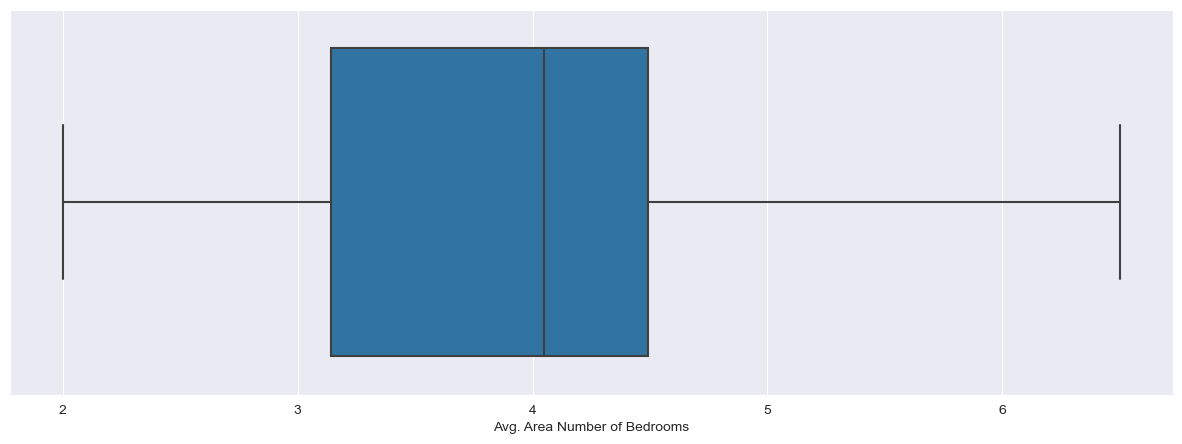

In [11]:
sns.boxplot(x='Avg. Area Number of Bedrooms', data=housing_data)
plt.show()

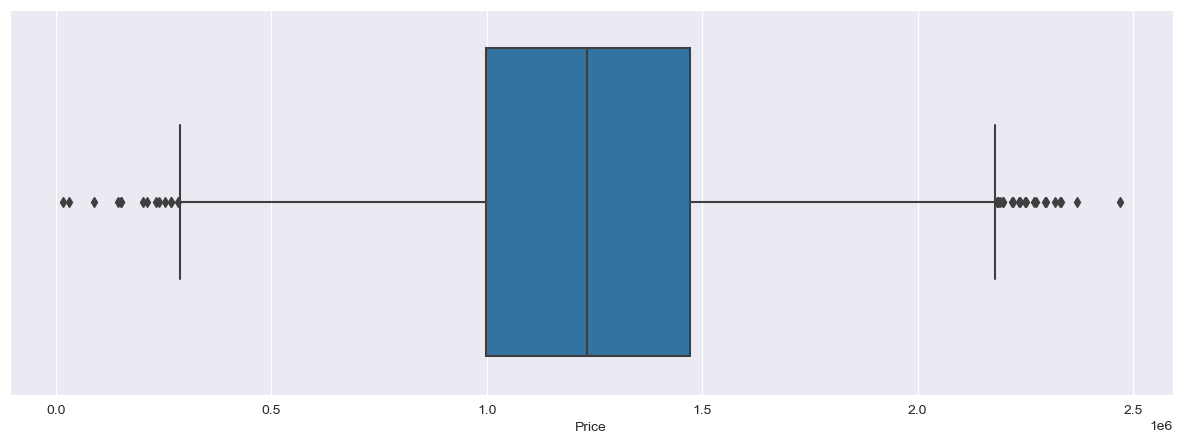

In [12]:
# Personal Practice 3
sns.boxplot(x = 'Price', data = housing_data)
plt.show()

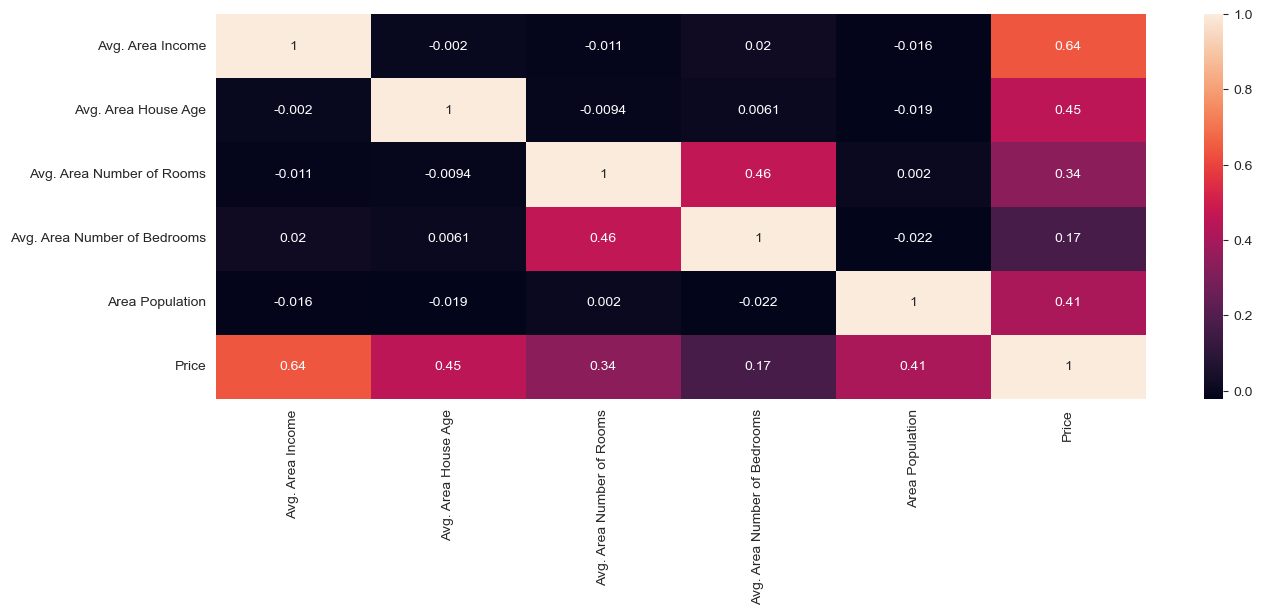

In [13]:
sns.heatmap(housing_data.corr(), annot = True)
plt.show()

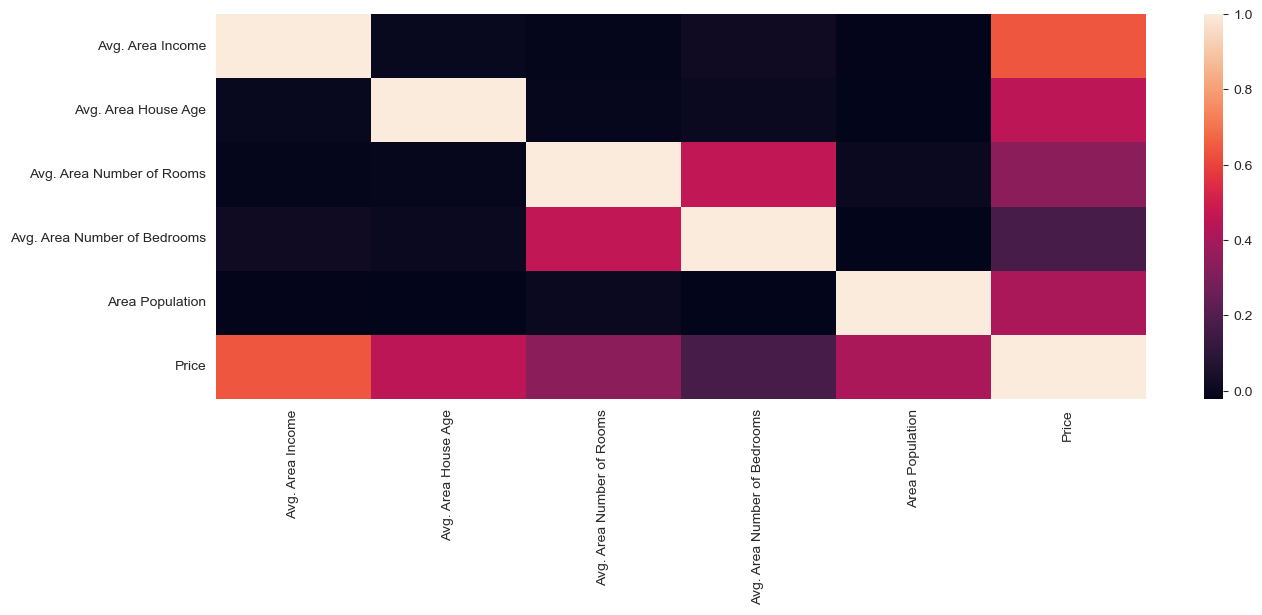

In [14]:
# Personal Practice 4
sns.heatmap(housing_data.corr(), annot = False)
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
X = housing_data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 
                  'Avg. Area Number of Bedrooms', 'Area Population']]
y = housing_data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [16]:
# Personal Practice 5
from sklearn.model_selection import train_test_split
x1 = housing_data['Avg. Area Income']
y1 = housing_data['Price']
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = .3)

In [17]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

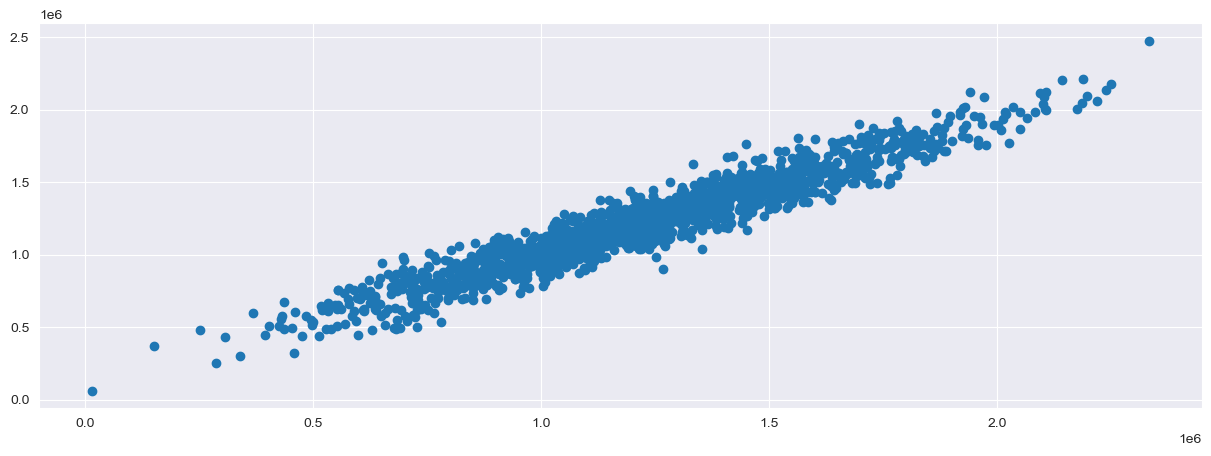

In [18]:
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)
plt.show()

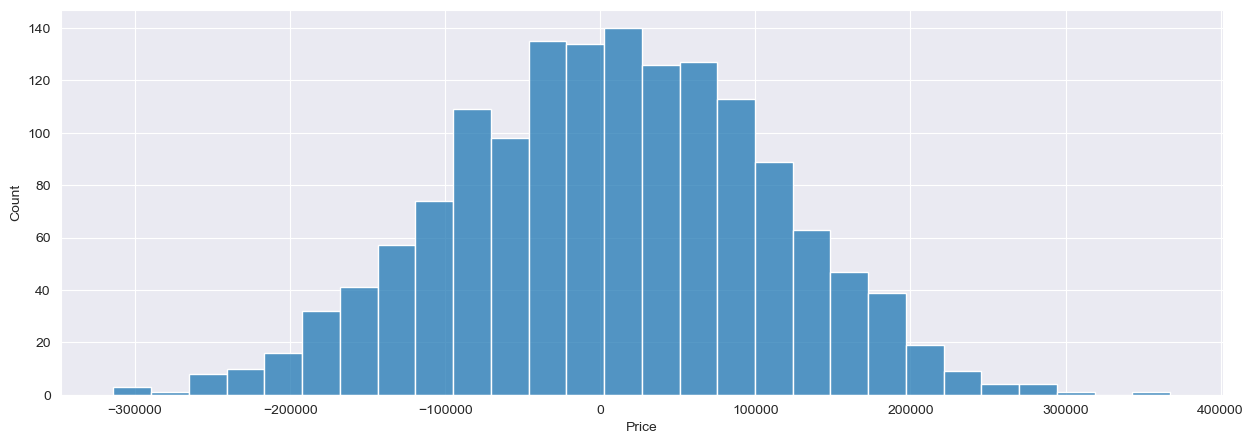

In [19]:
residuals = y_test - predictions
sns.histplot(residuals)
plt.show()

In [20]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 82263.1661325662
MSE: 10404689327.395033
RMSE: 102003.37899988917


In [21]:
# Personal Practice 6
print('RMSE:', metrics.mean_squared_error(y_test, predictions)**(1/2))

RMSE: 102003.37899988917


In [22]:
from sklearn.metrics import r2_score
print('R2 Score: ', r2_score(y_test, predictions))

R2 Score:  0.9174497959158895


In [23]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns = ['Coefficient'])
coeff_df

Coefficient
Avg. Area Income                  21.637822
Avg. Area House Age           165354.030808
Avg. Area Number of Rooms     120453.555240
Avg. Area Number of Bedrooms    1345.003680
Area Population                   15.139468

In [24]:
# Personal Practice 7
intercept_df = pd.DataFrame(lm.intercept_, X.columns, columns = ['Intercept'])
intercept_df

Intercept
Avg. Area Income             -2.636835e+06
Avg. Area House Age          -2.636835e+06
Avg. Area Number of Rooms    -2.636835e+06
Avg. Area Number of Bedrooms -2.636835e+06
Area Population              -2.636835e+06